In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We start by importing the necessary libraries required for preprocessing and visualization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We read the csv file and store it in df variable which reads the given file

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML Week 1/Copy of listings_data.csv')

We print the first 5 rows of the dataset to ensure that correct dataset has been loaded

In [4]:
df.head(5)

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


We start by cleaning the data and checking for any duplicates and null values

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

,0
listing_id,0
listing_name,16
host_id,0
host_name,21
borough,0
area,0
latitude,0
longitude,0
room_type,0
price (in dollars),0


As there are no duplicated values, we ignore it. There are null values, so we find their percentages to not lose important aspects of the dataset

In [7]:
def get_null_percentages(df, columns):
    result = {}
    for col in columns:
        if col in df.columns:
            null_count = df[col].isnull().sum()
            total_count = len(df)
            null_percentage = (null_count / total_count) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"

    return result

columns_to_check = ['listing_name','host_name','last_review_date','reviews_per_month']
null_percentages = get_null_percentages(df, columns_to_check)

# Display the results properly
for column, percentage in null_percentages.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")

listing_name: 0.03%
host_name: 0.04%
last_review_date: 20.56%
reviews_per_month: 20.56%


The null values percentage for listing_name and host_name are almost negligible so we can easily drop those rows without losing much data

In [8]:
df.dropna(subset=['host_name','listing_name'], inplace=True)

Next we fill the reviews_per_month column with a review of 0 as they might have not been filled

In [9]:
df['reviews_per_month'].fillna(0, inplace=True)

Now, we convert the listing_review_date to a date format from string and set the default as 01-01-1970 to avoid errors. It is usually to indicate that there were no reviews left for that particular listing

In [12]:
df['last_review_date'] = pd.to_datetime(df['last_review_date'], format='%d-%m-%Y')
df['last_review_date'].fillna('01-01-1970', inplace=True)

After cleaning and filling the data, we can use it for visualization

We create a new column for the years where reviews were sent

In [22]:
df['review_year'] = df['last_review_date'].dt.year

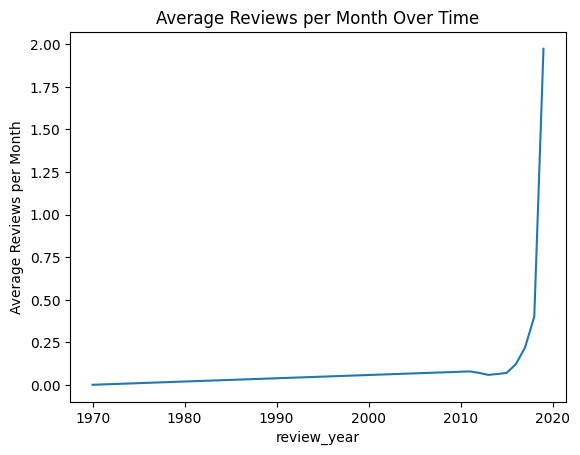

In [23]:
df.groupby('review_year')['reviews_per_month'].mean().plot(kind='line')
plt.title('Average Reviews per Month Over Time')
plt.ylabel('Average Reviews per Month')
plt.show()

***Observations:***

*   There are almost no reviews in the year 1970 and from there it starts increasingly steadily from 1970 to 2010 after which it sees a slight dip in the number of reviews.
*   It increases exponentially from that dip to 2020 reaching an average of 2.00 per month

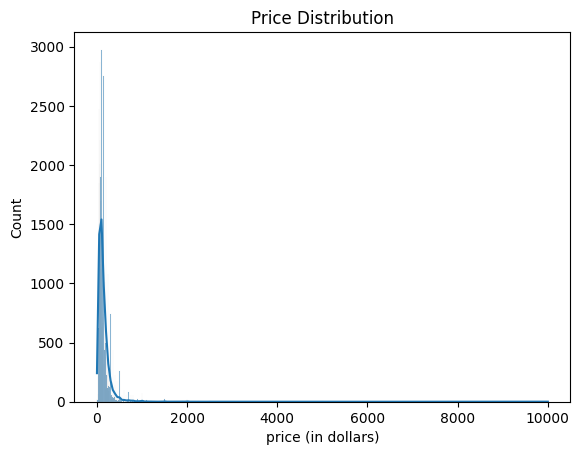

In [13]:
sns.histplot(df['price (in dollars)'], kde=True)
plt.title('Price Distribution')
plt.show()

***Observations:***

*   The data is right skewed and has price of listing upto 10000 dollars
*   Most of the values have their maximum price less than 2000 dollars which might be due to their locality and the amenties they offer



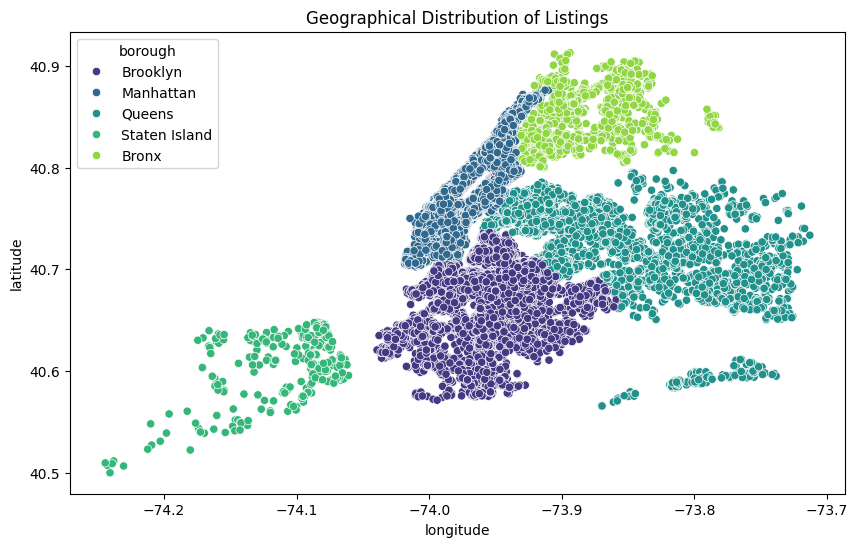

In [15]:
# Scatter plot for geographical distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='borough', data=df, palette='viridis')
plt.title('Geographical Distribution of Listings')
plt.show()

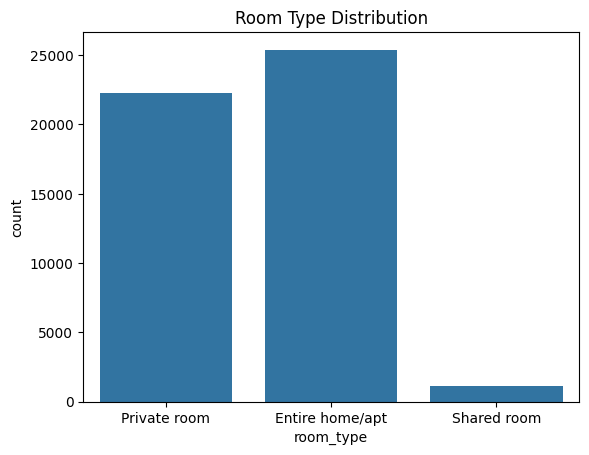

In [17]:
sns.countplot(x='room_type', data=df)
plt.title('Room Type Distribution')
plt.show()

***Observations:***


*   Most of the people either prefer entire home/apt or a private room rather than shared rooms
*   The difference between number of people preferring an entire home rather than private room is almost 2000 which is not a huge number indicating both of the options are equally preferred



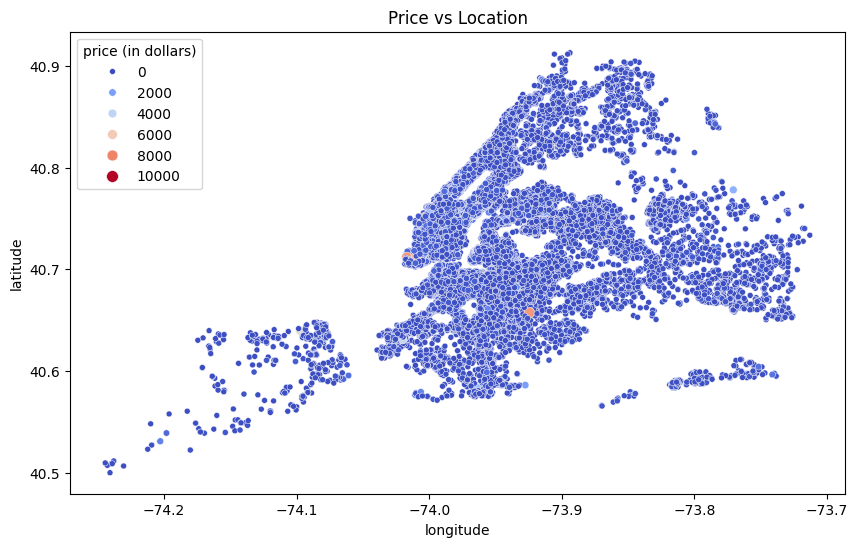

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', size='price (in dollars)', hue='price (in dollars)', data=df, palette='coolwarm')
plt.title('Price vs Location')
plt.show()

***Observations:***


*   The concentration of points indicate that most listing lie in range of 0 to 2000 dollars
*   There are few listings having price above 2000 dollars as seen about like the orange and light blue points



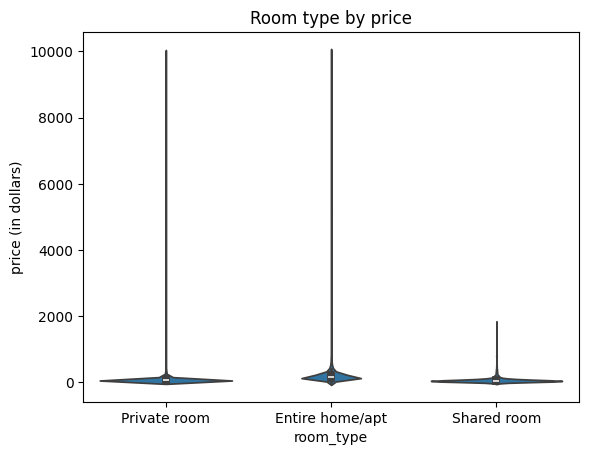

In [21]:
sns.violinplot( x='room_type',y='price (in dollars)', data=df).set(title='Room type by price')
plt.show()

***Observations:***


*   The maximum price for shared room is 2000 dollars while for entire home/apt and private room is about 10000 (almost 5 times)
*   The price distribution for private rooms is more constant than entire home/apt



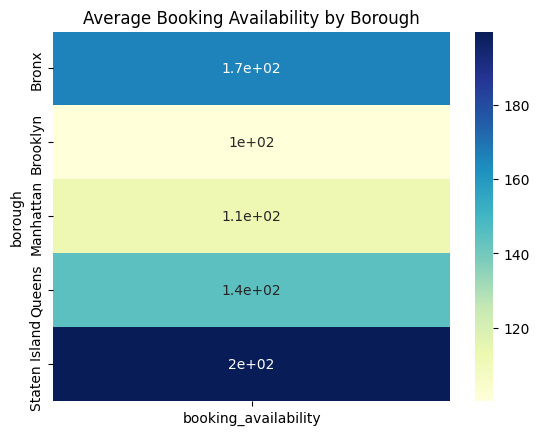

In [24]:
availability_pivot = df.pivot_table(index='borough', values='booking_availability', aggfunc='mean')
sns.heatmap(availability_pivot, annot=True, cmap='YlGnBu')
plt.title('Average Booking Availability by Borough')
plt.show()

***Observations:***


*   The maximum availability is in Staten Island while the minimum availability is from Bronx



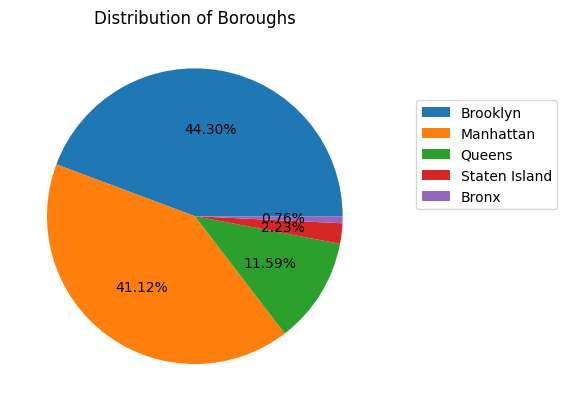

In [26]:
borough_count = df['borough'].value_counts()
plt.pie(borough_count, autopct='%.2f%%')
plt.legend(labels=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'], loc='lower right', bbox_to_anchor=(1.5, 0.5))
plt.title('Distribution of Boroughs')
plt.show()

***Observations:***


*   The maximum number of boroughs are from Brooklyn and Manhattan which have very less booking availability throughtout the year - they are more preferred
*   The minimum number of boroughs are from Staten Island and Bronx indicating how they have a higher availablity throughout the year



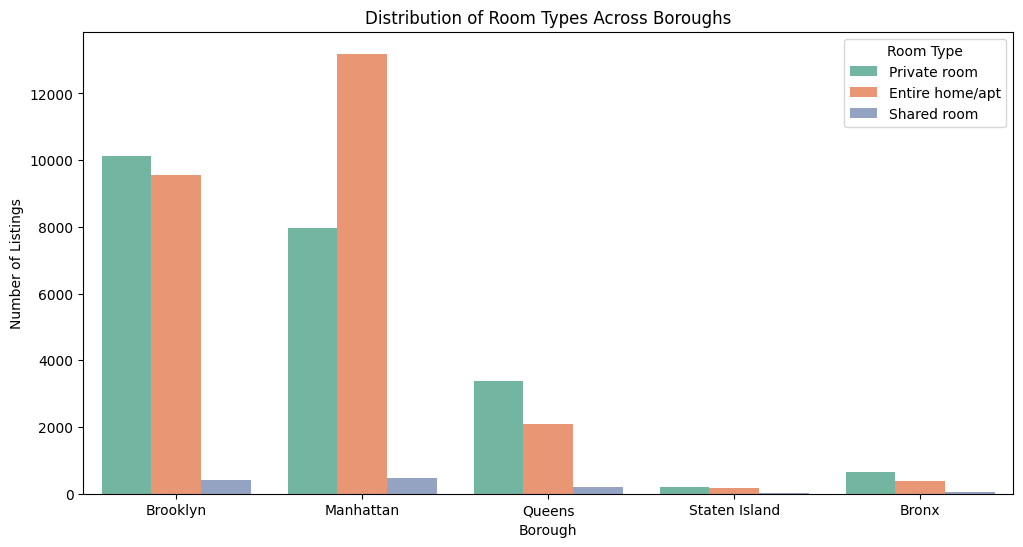

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='borough', hue='room_type', data=df, palette='Set2')
plt.title('Distribution of Room Types Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.legend(title='Room Type')
plt.show()

***Observations:***


*   Manhattan has the highest number of entire homes being listed



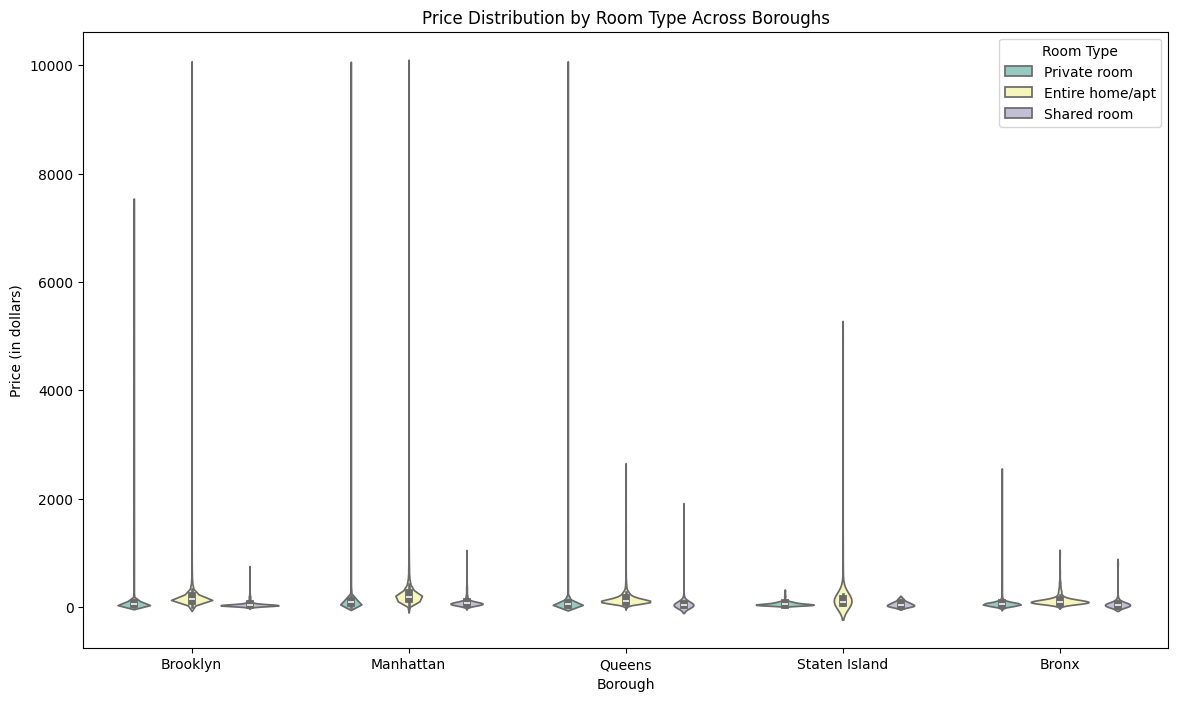

In [31]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='borough', y='price (in dollars)', hue='room_type', data=df, palette='Set3')
plt.title('Price Distribution by Room Type Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Price (in dollars)')
plt.legend(title='Room Type')
plt.show()

***Observations:***


*   The price distribution for Bronx is lowest indicating that there are either not many listings there or the amenities available are very low
*   Manhattan has the highest price for private room and apartments indicating a lot of people prefer it



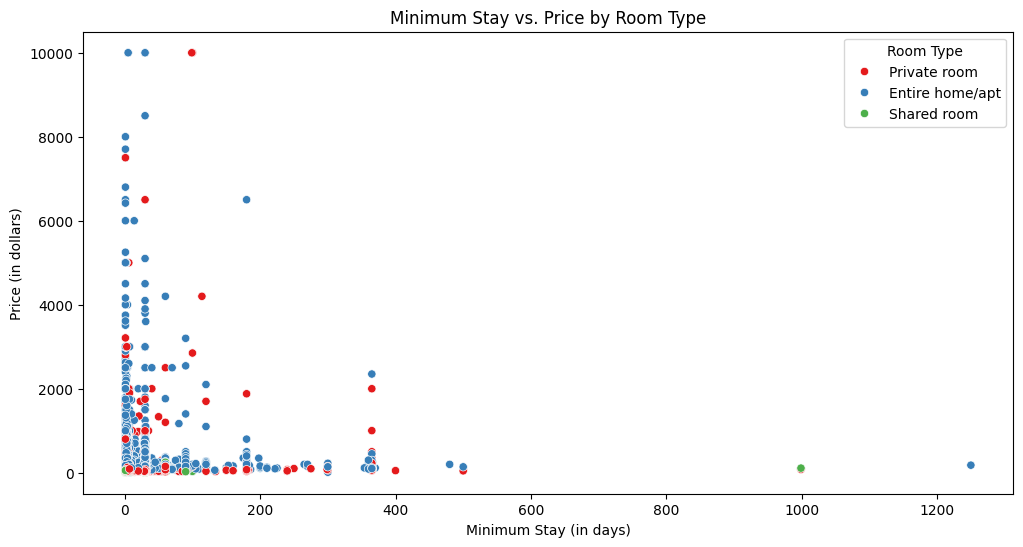

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='minimum_stay', y='price (in dollars)', hue='room_type', data=df, palette='Set1')
plt.title('Minimum Stay vs. Price by Room Type')
plt.xlabel('Minimum Stay (in days)')
plt.ylabel('Price (in dollars)')
plt.legend(title='Room Type')
plt.show()

There is no correlation between the price and minimum stay overall

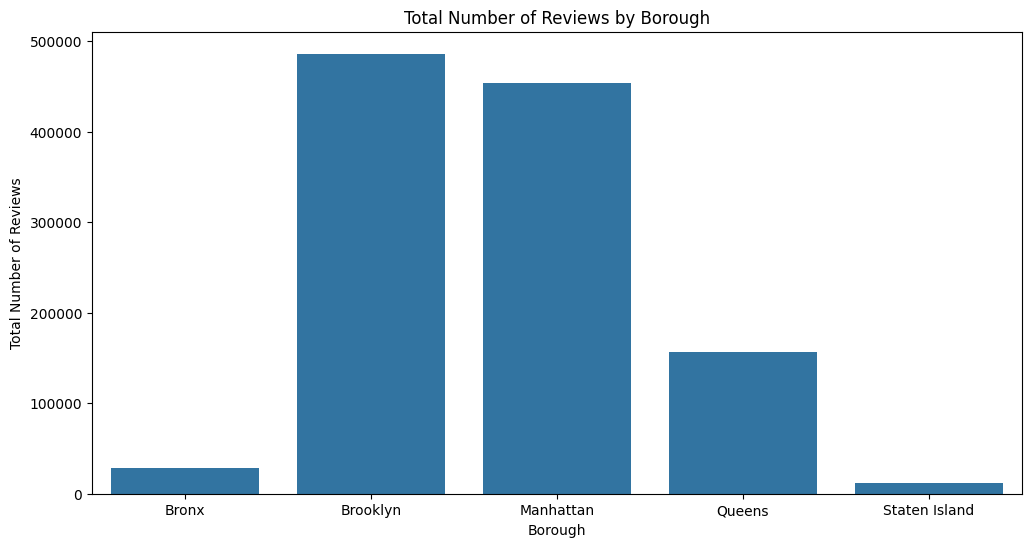

In [39]:
reviews_by_borough = df.groupby('borough')['no_of_reviews'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='borough', y='no_of_reviews', data=reviews_by_borough)
plt.title('Total Number of Reviews by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Number of Reviews')
plt.show()

The listings in Brooklyn have received the highest number of reviews while from Staten Island have received the lowers number of reviews

In [42]:
host_listing_counts = df['host_name'].value_counts().reset_index()
host_listing_counts.columns = ['host_name', 'listing_count']
top_hosts = host_listing_counts.head(10)
print(top_hosts)

      host_name  listing_count
0       Michael            417
1         David            403
2  Sonder (NYC)            327
3          John            294
4          Alex            279
5    Blueground            232
6         Sarah            227
7        Daniel            226
8       Jessica            205
9         Maria            204


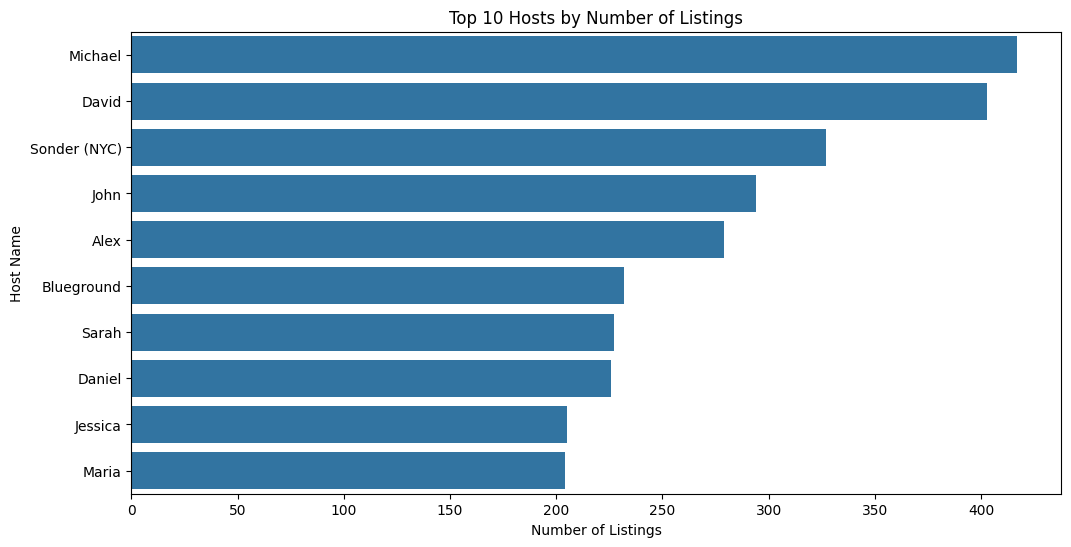

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x='listing_count', y='host_name', data=top_hosts)
plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Host Name')
plt.show()

In [53]:
import plotly.express as px
fig = px.sunburst(df, path=['review_year', 'borough'],
                  title='Sunburst Chart of Borough by Review Year',
                  color='borough',
                  color_discrete_sequence=px.colors.qualitative.Prism)

fig.update_layout(uniformtext=dict(minsize=10, mode='hide'))
fig.update_traces(hovertemplate='<b>%{label}</b><br>Count: %{value}')
fig.show()

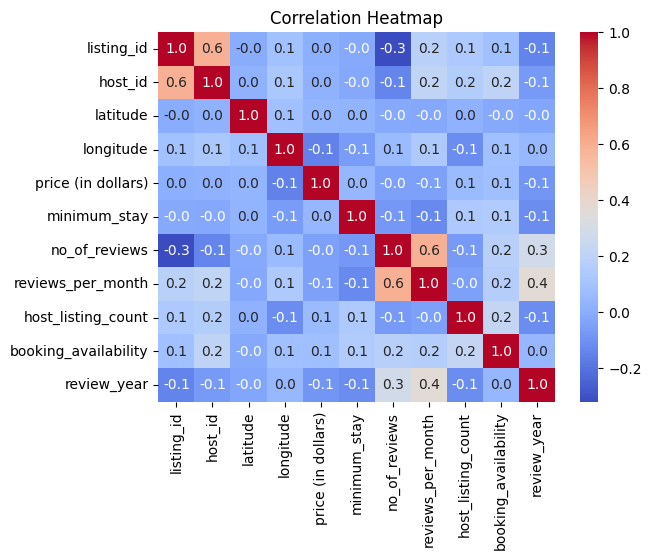

In [54]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', cmap='coolwarm').set(title='Correlation Heatmap')
plt.show()

***Observations:***

*   No correlation between most of the attributes
*   A pretty high positive correlation between Number of Reviews & Reviews per Month which makes sense.
*   A pretty high positive correlation between Host ID & Listing ID which again makes sense.
*   A pretty weak positive correlation between Reviews Per Month & Review Year which also makes sense.
*   A weak negative correlation between Number of Reviews and Listing ID which is understandable.

In [55]:
df.to_csv('new_listings_data.csv')